In [1]:
import pyccl as ccl
import matplotlib.pyplot as plt

In [2]:
from aemulusnu_hmf import massfunction as hmf

In [3]:
fiducial_cosmology = {'10^9 As':2.09681,
                      'ns': 0.9652,
                      'H0': 67.37,
                      'w0': -1,
                      'ombh2': 0.02233,
                      'omch2': 0.1198,
                      'nu_mass_ev': 0.07,} #this line changed
h = fiducial_cosmology['H0']/100
Ωb =  fiducial_cosmology['ombh2'] / h**2
Ωc =  fiducial_cosmology['omch2'] / h**2

fiducial_ccl_cosmo = ccl.Cosmology(Omega_c=Ωc,
                          Omega_b=Ωb,
                          h=h,
                          A_s=fiducial_cosmology['10^9 As']*10**(-9),
                          n_s=fiducial_cosmology['ns'],
                          w0=fiducial_cosmology['w0'],
                          m_nu=[fiducial_cosmology['nu_mass_ev']/3, fiducial_cosmology['nu_mass_ev']/3, fiducial_cosmology['nu_mass_ev']/3])



In [4]:
import numpy as np

In [5]:
M = np.logspace(13,16, 100)

In [7]:
import aemulusnu_hmf.massfunction as hmf

cosmology = hmf.cosmology(fiducial_cosmology)

z = 2
sigma_cb = cosmology.sigma_cb(M, z)
d_ln_sigma_cb_dM = cosmology.dln_sigma_cb_dM(M, z)
rho_cb = cosmology.f_rho_cb(0.0)
scale_params = dict(zip(['d','e','f','g'],[2.11383152, 1., 0.52542576, 1.23987508]))
f = hmf.f_G(sigma_cb, **scale_params)

dn_dM = f * rho_cb/M * (-d_ln_sigma_cb_dM) 

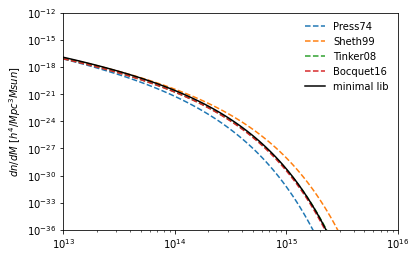

In [8]:
hmfs = []
# Press & Schechter mass function
hmfs.append(ccl.halos.MassFuncPress74(mass_def='200m', mass_def_strict=False))

# Sheth & Tormen mass function
hmfs.append(ccl.halos.MassFuncSheth99(mass_def='200m', mass_def_strict=False))

# Tinker 2008 mass function
hmfs.append(ccl.halos.MassFuncTinker08(mass_def='200m', mass_def_strict=False))


# Bocquet 2016 mass function
hmfs.append(ccl.halos.MassFuncBocquet16(mass_def='200m'))

# # Bocquet 2020 mass function
# hmfs.append(ccl.halos.MassFuncBocquet20(mass_def='200m', mass_def_strict=False))

plt.figure()
for mf in hmfs:
    nm = mf(fiducial_ccl_cosmo, M/h, 1/(1+z))
    plt.plot(M, nm/(h**3 * M * np.log(10)), '--', label=mf.name)
    
plt.plot(M, dn_dM, 'k',label='minimal lib')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-36, 1e-12)
plt.xlim(1e13, 1e16)
plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
plt.legend(frameon=False)

In [15]:
rhom_ccl = (ccl.physical_constants.RHO_CRITICAL * fiducial_ccl_cosmo['Omega_m'])

In [16]:
(cosmology.rho_m_0-rhom_ccl)/rhom_ccl

-0.0009603741334543978